In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    TimeDistributed, BatchNormalization, LSTM
)
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)


## CNN

In [ ]:
# Load kedua file .npz
data_train_cnn = np.load("../data/processed/cnn_train_data.npz")
data_val_cnn = np.load("../data/processed/cnn_val_data.npz")
data_test_cnn = np.load("../data/processed/cnn_test_data.npz")

In [3]:
X_train_cnn = data_train_cnn["data"]
y_train_cnn = data_train_cnn["label"]

In [4]:
#X_test_cnn = (data_test_cnn["data"] - min_mel)/(max_mel-min_mel)
X_val_cnn = data_val_cnn["data"]
y_val_cnn = data_val_cnn["label"]

In [5]:
# Lightweight CNN Model
model_cnn = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1), name='conv2d_1'),
    BatchNormalization(),
    MaxPooling2D(2, 2, name='maxpool_1'),

    Conv2D(16, (3, 3), activation='relu', name='conv2d_2'),
    MaxPooling2D(2, 2, name='maxpool_2'),

    Flatten(name='flatten'),
    Dense(32, activation='relu', name='dense_1'),
    Dropout(0.5, name='dropout_1'),

    Dense(1, activation='sigmoid', name='output')  # Binary classification
])

# Compile the model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

d:\Anacondas\envs\tf128\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history_cnn = model_cnn.fit(
    X_train_cnn,
    y_train_cnn,
    validation_data=(X_val_cnn, y_val_cnn),  # validasi eksplisit
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/30
242/242 [==============================] - 25s 85ms/step - loss: 0.4122 - accuracy: 0.7817 - val_loss: 0.4657 - val_accuracy: 0.7819
Epoch 2/30
242/242 [==============================] - 17s 70ms/step - loss: 0.2821 - accuracy: 0.8779 - val_loss: 0.2672 - val_accuracy: 0.9193
Epoch 3/30
242/242 [==============================] - 25s 102ms/step - loss: 0.2238 - accuracy: 0.9106 - val_loss: 0.2452 - val_accuracy: 0.8988
Epoch 4/30
242/242 [==============================] - 28s 116ms/step - loss: 0.1817 - accuracy: 0.9339 - val_loss: 0.2691 - val_accuracy: 0.8977
Epoch 5/30
242/242 [==============================] - 22s 93ms/step - loss: 0.1655 - accuracy: 0.9407 - val_loss: 0.2487 - val_accuracy: 0.9252
Epoch 6/30
242/242 [==============================] - 21s 85ms/step - loss: 0.1485 - accuracy: 0.9478 - val_loss: 0.1881 - val_accuracy: 0.9449
Epoch 7/30
242/242 [==============================] - 15s 63ms/step - loss: 0.1430 - accuracy: 0.9487 - val_loss: 0.2643 - val_accurac

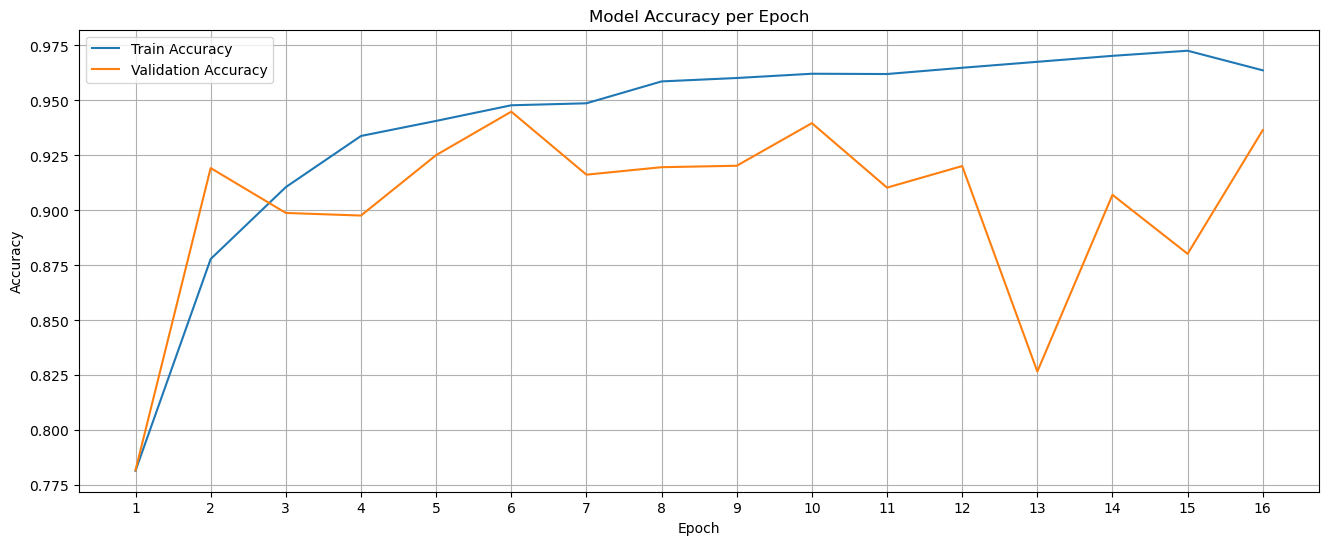

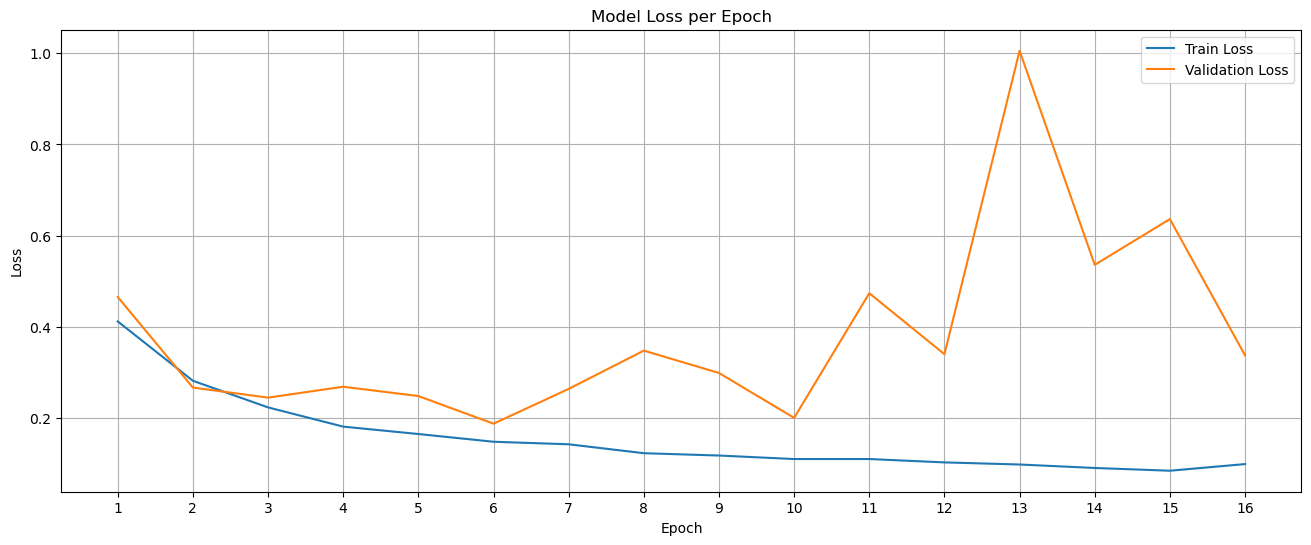

In [8]:
# Ambil nilai akurasi dan loss dari history
train_acc_cnn = history_cnn.history['accuracy']
val_acc_cnn = history_cnn.history['val_accuracy']
train_loss_cnn = history_cnn.history['loss']
val_loss_cnn = history_cnn.history['val_loss']

# Epochs range
epochs = range(1, len(train_acc_cnn) + 1)

# === Plot Akurasi ===
plt.figure(figsize=(16, 6))
plt.plot(epochs, train_acc_cnn, label="Train Accuracy")
plt.plot(epochs, val_acc_cnn, label="Validation Accuracy")
plt.title("Model Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

# === Plot Loss ===
plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss_cnn, label="Train Loss")
plt.plot(epochs, val_loss_cnn, label="Validation Loss")
plt.title("Model Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

242/242 [==============================] - 4s 18ms/step
✅ Train Accuracy (CNN): 98.95%


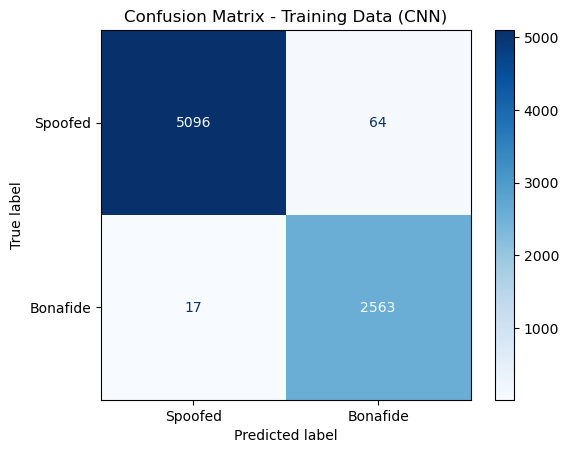

239/239 [==============================] - 6s 23ms/step
✅ Validation Accuracy (CNN): 94.49%


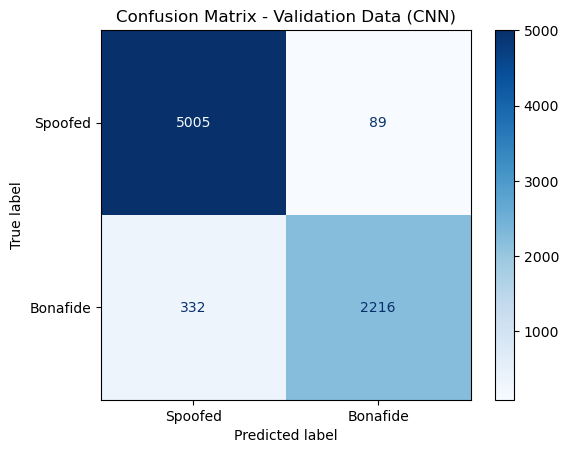

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# ===== Evaluasi pada Data Training =====
y_pred_train_cnn = model_cnn.predict(X_train_cnn)
y_pred_train_cnn_labels = (y_pred_train_cnn > 0.5).astype(int).flatten()
y_train_labels = y_train_cnn

train_acc_cnn = accuracy_score(y_train_labels, y_pred_train_cnn_labels)
print(f"✅ Train Accuracy (CNN): {train_acc_cnn * 100:.2f}%")

cf_train_cnn = confusion_matrix(y_train_labels, y_pred_train_cnn_labels, labels=[1, 0])
ConfusionMatrixDisplay(cf_train_cnn, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Training Data (CNN)")
plt.show()

# ===== Evaluasi pada Data Validation =====
y_pred_val_cnn = model_cnn.predict(X_val_cnn)
y_pred_val_cnn_labels = (y_pred_val_cnn > 0.5).astype(int).flatten()
y_val_labels = y_val_cnn

val_acc_cnn = accuracy_score(y_val_labels, y_pred_val_cnn_labels)
print(f"✅ Validation Accuracy (CNN): {val_acc_cnn * 100:.2f}%")

cf_val_cnn = confusion_matrix(y_val_labels, y_pred_val_cnn_labels, labels=[1, 0])
ConfusionMatrixDisplay(cf_val_cnn, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Data (CNN)")
plt.show()


In [ ]:
X_train_cnn = np.concatenate([data_train_cnn['data'], data_val_cnn['data']], axis=0)
y_train_cnn = np.concatenate([data_train_cnn['label'], data_val_cnn['label']], axis=0)

In [6]:
X_test_cnn = data_test_cnn["data"]
y_test_cnn = data_test_cnn["label"]

In [ ]:
# Lightweight CNN Model
model_cnn = Sequential([
    Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 1), name='conv2d_1'),
    BatchNormalization(),
    MaxPooling2D(2, 2, name='maxpool_1'),

    Conv2D(16, (3, 3), activation='relu', name='conv2d_2'),
    MaxPooling2D(2, 2, name='maxpool_2'),

    Flatten(name='flatten'),
    Dense(32, activation='relu', name='dense_1'),
    Dropout(0.5, name='dropout_1'),

    Dense(1, activation='sigmoid', name='output')  # Binary classification
])

# Compile the model
model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
# Training model dengan data validasi eksplisit
history_cnn = model_cnn.fit(
    X_train_cnn,
    y_train_cnn,
    epochs=30,
    batch_size=32
)

Epoch 1/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7399 - loss: 0.4988
Epoch 2/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8948 - loss: 0.3015
Epoch 3/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9131 - loss: 0.2509
Epoch 4/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9259 - loss: 0.2165
Epoch 5/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9375 - loss: 0.1850
Epoch 6/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9539 - loss: 0.1317
Epoch 7/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9566 - loss: 0.1232
Epoch 8/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9588 - loss: 0.1160
Epoch 9/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9654 - loss: 0.1021
Epoch 10/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9658 - loss: 0.1013
Epoch 11/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9676 - loss: 0.0947
Epoch 12/30
481/481 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

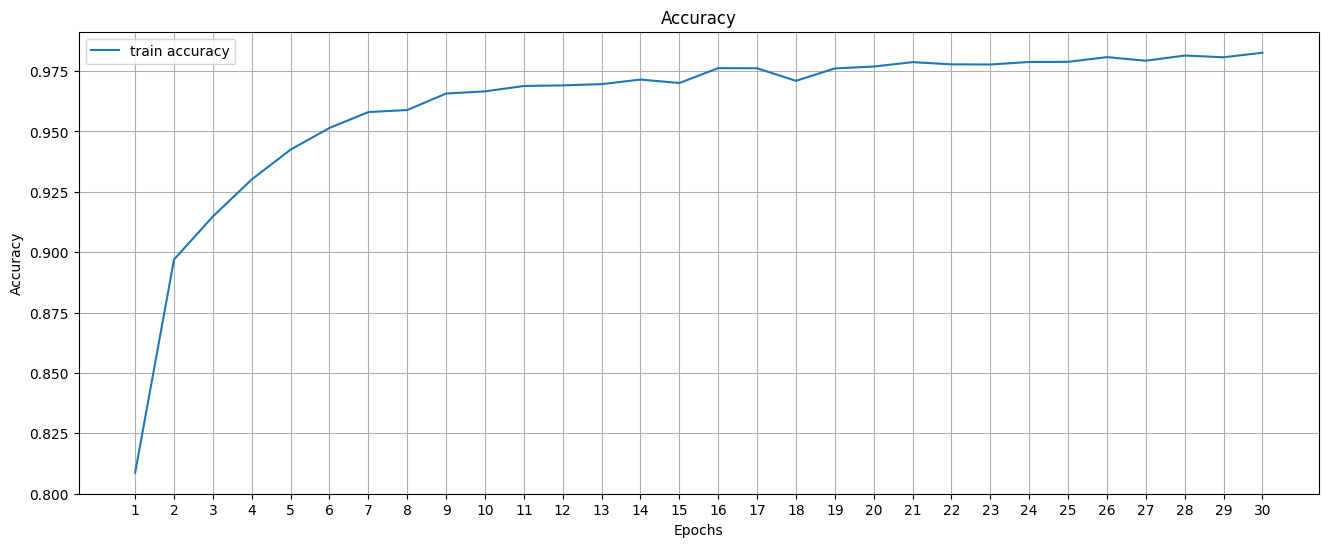

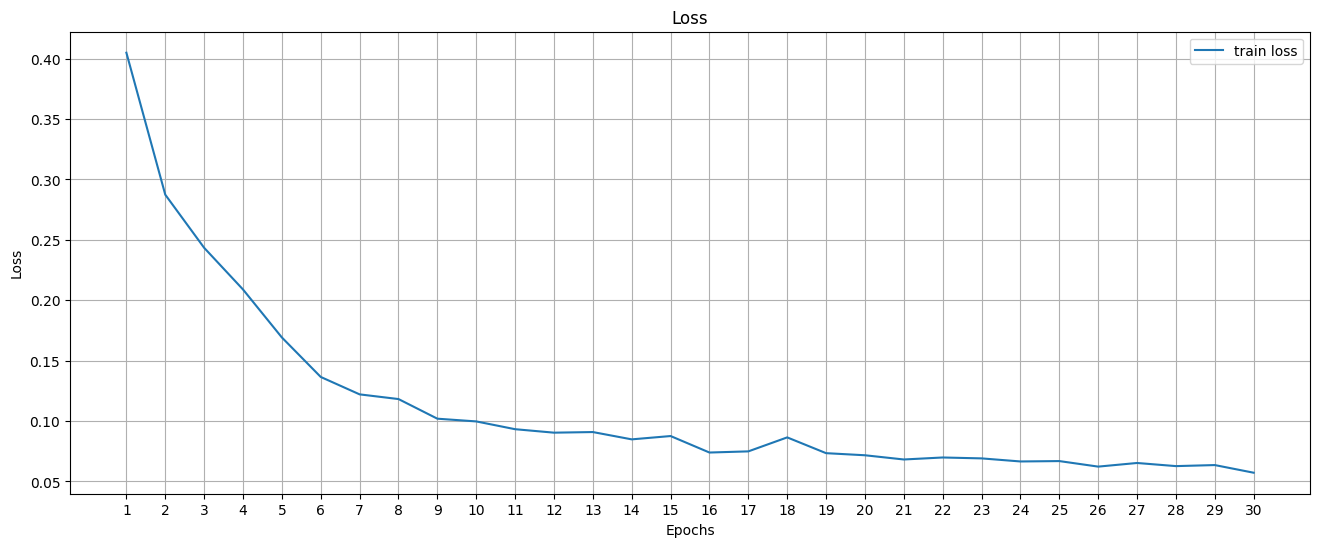

In [24]:
train_acc_cnn = history_cnn.history['accuracy']
train_loss_cnn = history_cnn.history['loss']

epochs = range(1, len(train_acc_cnn) + 1)  # buat range dari 1 sampai jumlah epoch

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_acc_cnn, label="train accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss_cnn, label="train loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model_cnn.save("../model/model_cnn_bener.h5") 
model_cnn = load_model("../model/model_cnn_fix.h5")  # atau direktori jika pakai SavedModel


481/481 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step


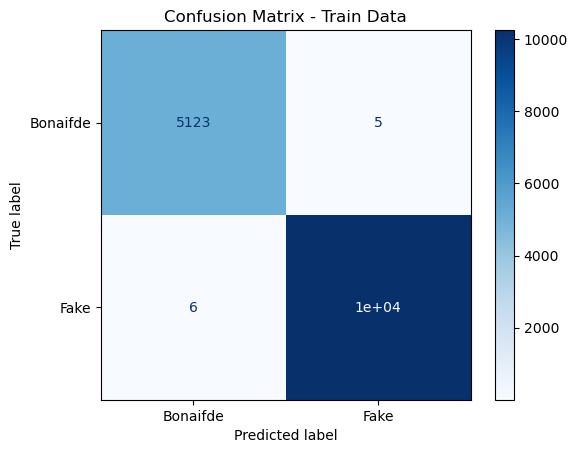

Train Accuracy: 99.93%


In [8]:
# Prediksi pada data latih
y_pred_train_cnn = model_cnn.predict(X_train_cnn)
y_pred_train_classes_cnn = (y_pred_train_cnn > 0.5).astype("int32")

# Confusion matrix untuk data latih
cm_train_cnn = confusion_matrix(y_train_cnn, y_pred_train_classes_cnn)
disp_train_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_train_cnn, display_labels=["Bonaifde", "Fake"])
disp_train_cnn.plot(cmap="Blues")
plt.title("Confusion Matrix - Train Data")
plt.show()

# Akurasi data latih
acc_train_cnn = accuracy_score(y_train_cnn, y_pred_train_classes_cnn)
print(f"Train Accuracy: {acc_train_cnn * 100:.2f}%")


690/690 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step
✅ Test Accuracy (CNN): 91.43%


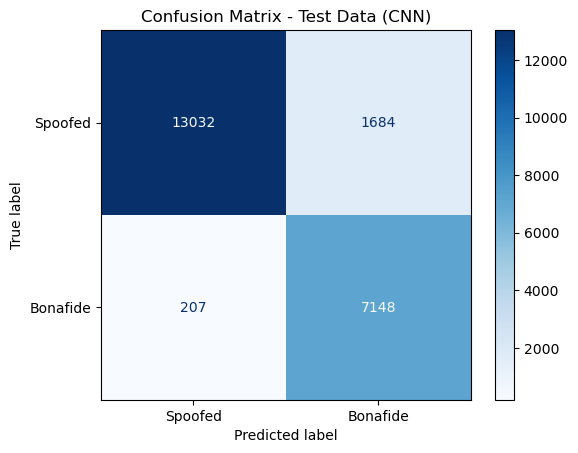

In [9]:
# ===== Evaluasi pada Data Testing =====
y_pred_test_cnn = model_cnn.predict(X_test_cnn)
y_pred_test_cnn_labels = (y_pred_test_cnn > 0.5).astype(int).flatten()
y_test_labels = y_test_cnn  # diasumsikan sudah dalam format label biner (0 atau 1)

# Akurasi
test_acc_cnn = accuracy_score(y_test_labels, y_pred_test_cnn_labels)
print(f"✅ Test Accuracy (CNN): {test_acc_cnn * 100:.2f}%")

# Confusion matrix
cf_test_cnn = confusion_matrix(y_test_labels, y_pred_test_cnn_labels, labels=[1, 0])
ConfusionMatrixDisplay(cf_test_cnn, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data (CNN)")
plt.show()


In [10]:
from sklearn.metrics import classification_report

# ===== METRIK EVALUASI TEST DATA (CNN) =====
print("=== Classification Report - Test Data (CNN) ===")
print(classification_report(
    y_test_labels,
    y_pred_test_cnn_labels,
    target_names=["Bonafide", "Spoofed"],
    digits=4
))


=== Classification Report - Test Data (CNN) ===
              precision    recall  f1-score   support

    Bonafide     0.8093    0.9719    0.8832      7355
     Spoofed     0.9844    0.8856    0.9324     14716

    accuracy                         0.9143     22071
   macro avg     0.8968    0.9287    0.9078     22071
weighted avg     0.9260    0.9143    0.9160     22071



In [ ]:
data_label = pd.read_csv("../data/processed/test_label.csv")
test_labels = data_label["attack_id"].copy()

In [12]:
test_labels=  pd.DataFrame(test_labels)

In [13]:
test_labels["y_true"]=y_test_labels
test_labels["y_pred"] = y_pred_test_cnn_labels

In [14]:
# Gabungkan hasil prediksi CNN ke dalam test_labels
test_labels["y_true"] = y_test_labels
test_labels["y_pred"] = y_pred_test_cnn_labels

# Tambahkan kolom 'is_correct' untuk menandai apakah prediksi benar
test_labels["is_correct"] = test_labels["y_true"] == test_labels["y_pred"]

# Hitung jumlah benar dan salah per attack_id
grouped_cnn = test_labels.groupby(["attack_id", "is_correct"]).size().unstack(fill_value=0)

# Rename kolom agar lebih deskriptif
grouped_cnn = grouped_cnn.rename(columns={True: "benar", False: "salah"})

# Tambahkan kolom total
grouped_cnn["total"] = grouped_cnn["benar"] + grouped_cnn["salah"]

# Urutkan berdasarkan jumlah salah (descending)
grouped_cnn = grouped_cnn.sort_values(by="salah", ascending=False)

# Tampilkan hasil rekap
print("📊 Rekap klasifikasi per attack_id (CNN):")
print(grouped_cnn)


📊 Rekap klasifikasi per attack_id (CNN):
is_correct  salah  benar  total
attack_id                      
A17           644    488   1132
A18           553    579   1132
A19           318    814   1132
-             207   7148   7355
A08           104   1028   1132
A07            18   1114   1132
A10            18   1114   1132
A11            13   1119   1132
A16             8   1124   1132
A13             6   1126   1132
A15             2   1130   1132
A09             0   1132   1132
A14             0   1132   1132
A12             0   1132   1132


## CNN-LSTM

In [ ]:
# Load kedua file .npz
data_train_cnn_lstm = np.load("../data/processed/cnn_lstm_train_data.npz")
data_val_cnn_lstm = np.load("../data/processed/cnn_lstm_val_data.npz")
data_test_cnn_lstm = np.load("../data/processed/cnn_lstm_test_data.npz")

In [3]:
X_train_cnn_lstm = data_train_cnn_lstm["data"]
y_train_cnn_lstm = data_train_cnn_lstm["label"]

In [4]:
X_val_cnn_lstm = data_val_cnn_lstm["data"]
y_val_cnn_lstm = data_val_cnn_lstm["label"]

In [5]:
#X_train_cnn_lstm = (data_train_cnn_lstm["data"] - min_mel)/(max_mel-min_mel)
X_test_cnn_lstm = data_test_cnn_lstm["data"]
y_test_cnn_lstm = data_test_cnn_lstm["label"]

In [6]:
X_train_cnn_lstm.min()

0.0

In [7]:
X_train_cnn_lstm.max()

1.0

In [ ]:
# Lightweight CNN-LSTM model
model_cnn_lstm = Sequential([
    # TimeDistributed CNN layers
    TimeDistributed(Conv2D(8, (3, 3), activation='relu', padding='same'),
                    input_shape=(32, 128, 4, 1), name="conv2d_1"),
    TimeDistributed(BatchNormalization(), name="batchnorm_1"),
    TimeDistributed(MaxPooling2D((2, 2), padding="same"), name="maxpool_1"),

    TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'), name="conv2d_2"),
    TimeDistributed(MaxPooling2D((2, 2), padding="same"), name="maxpool_2"),

    TimeDistributed(Flatten(), name="flatten"),

    # LSTM layers
    LSTM(64, return_sequences=True, name="lstm_1"),
    LSTM(32, return_sequences=False, name="lstm_2"),

    # Fully connected layers
    Dense(32, activation='relu', name="dense_1"),
    Dropout(0.4, name="dropout_1"),

    Dense(1, activation='sigmoid', name="output")
])

# Compile the model
model_cnn_lstm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Define EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Summary
model_cnn_lstm.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (TimeDistributed)  (None, 32, 128, 4, 8)     80        
                                                                 
 batchnorm_1 (TimeDistribute  (None, 32, 128, 4, 8)    32        
 d)                                                              
                                                                 
 maxpool_1 (TimeDistributed)  (None, 32, 64, 2, 8)     0         
                                                                 
 conv2d_2 (TimeDistributed)  (None, 32, 64, 2, 16)     1168      
                                                                 
 maxpool_2 (TimeDistributed)  (None, 32, 32, 1, 16)    0         
                                                                 
 flatten (TimeDistributed)   (None, 32, 512)           0         
                                                        

In [ ]:
# Training model dengan data validasi eksplisit
history_cnn_lstm = model_cnn_lstm.fit(
    X_train_cnn_lstm,
    y_train_cnn_lstm,
    validation_data = (X_val_cnn_lstm, y_val_cnn_lstm),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.6565 - loss: 0.6250 - val_accuracy: 0.8338 - val_loss: 0.3932
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8198 - loss: 0.3930 - val_accuracy: 0.8436 - val_loss: 0.3488
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.8726 - loss: 0.2975 - val_accuracy: 0.9041 - val_loss: 0.2551
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9060 - loss: 0.2335 - val_accuracy: 0.9089 - val_loss: 0.2233
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9353 - loss: 0.1836 - val_accuracy: 0.8945 - val_loss: 0.2939
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9446 - loss: 0.1651 - val_accuracy: 0.8911 - val_loss: 0.3132
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - accuracy: 0.9622 - loss: 0.1254 - val_accuracy: 0.9157 - val_loss: 0.2429
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9737 - loss: 0.0970 - val_ac

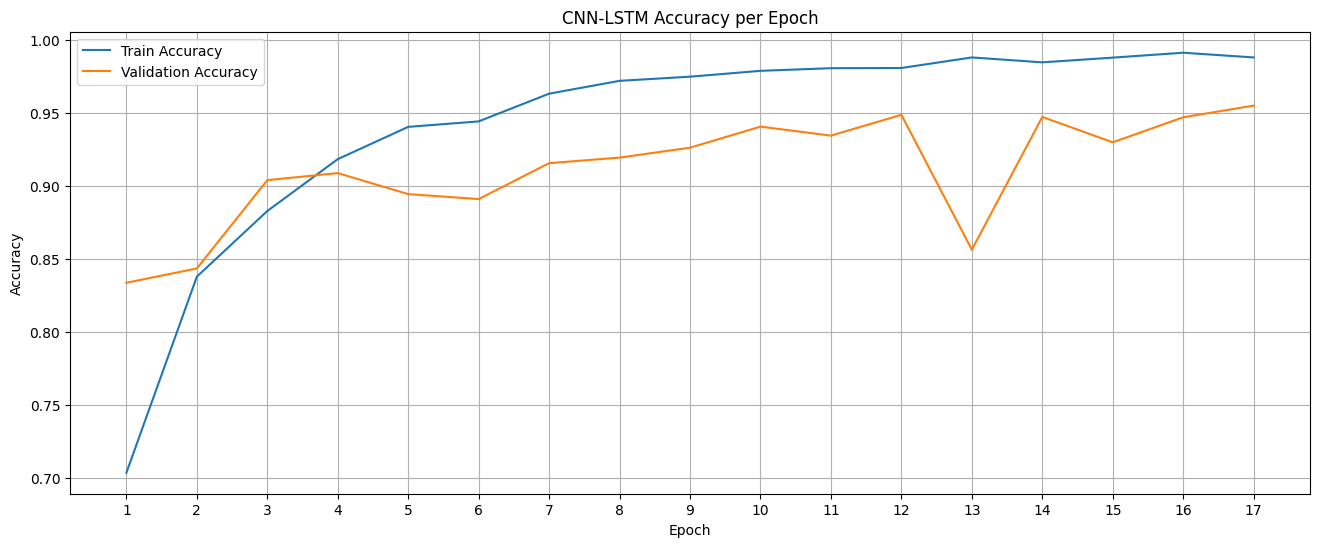

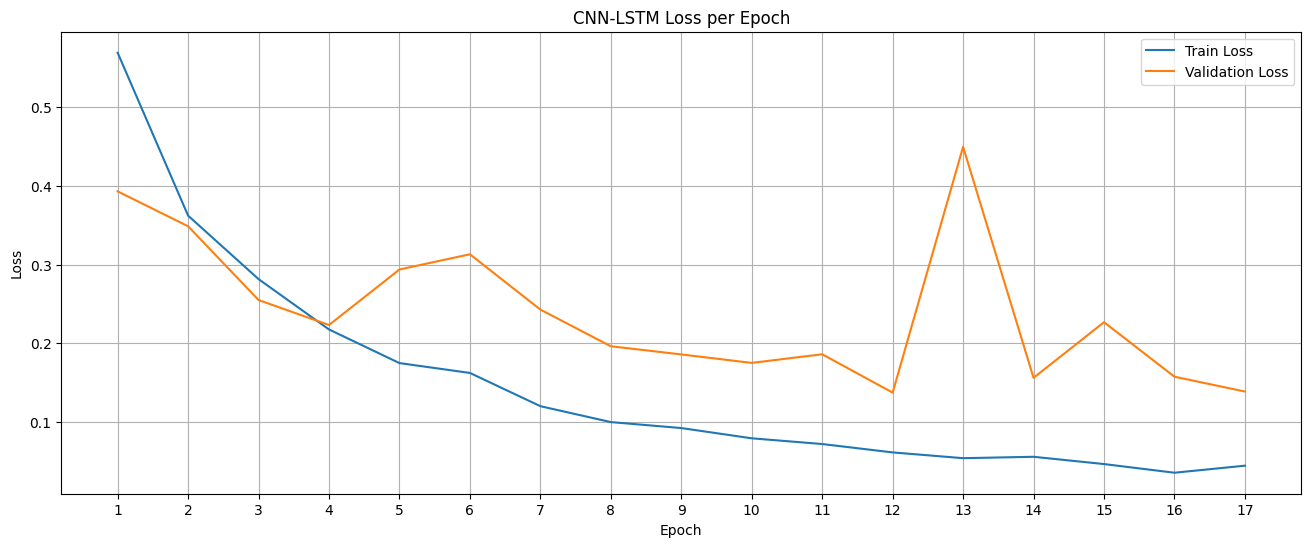

In [21]:
# Ambil nilai akurasi dan loss dari history CNN-LSTM
train_acc_cnn_lstm = history_cnn_lstm.history['accuracy']
val_acc_cnn_lstm = history_cnn_lstm.history['val_accuracy']
train_loss_cnn_lstm = history_cnn_lstm.history['loss']
val_loss_cnn_lstm = history_cnn_lstm.history['val_loss']

# Epochs range
epochs = range(1, len(train_acc_cnn_lstm) + 1)

# === Plot Akurasi CNN-LSTM ===
plt.figure(figsize=(16, 6))
plt.plot(epochs, train_acc_cnn_lstm, label="Train Accuracy")
plt.plot(epochs, val_acc_cnn_lstm, label="Validation Accuracy")
plt.title("CNN-LSTM Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

# === Plot Loss CNN-LSTM ===
plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss_cnn_lstm, label="Train Loss")
plt.plot(epochs, val_loss_cnn_lstm, label="Validation Loss")
plt.title("CNN-LSTM Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()


242/242 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
✅ Train Accuracy (CNN-LSTM): 95.90%


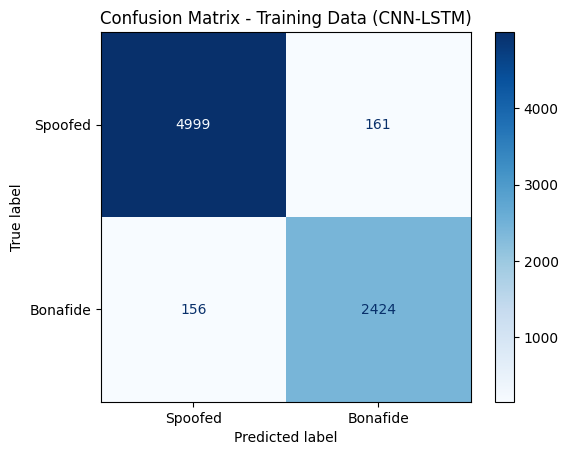

239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
✅ Validation Accuracy (CNN-LSTM): 94.88%


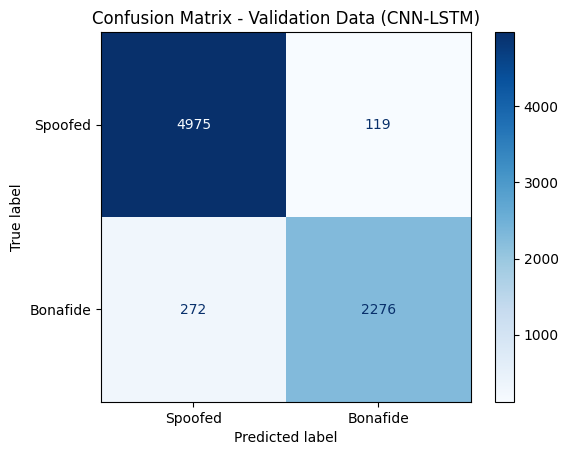

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# ===== Evaluasi pada Data Training =====
y_pred_train_cnn_lstm = model_cnn_lstm.predict(X_train_cnn_lstm)
y_pred_train_cnn_lstm_labels = (y_pred_train_cnn_lstm > 0.5).astype(int).flatten()
y_train_labels_lstm = y_train_cnn_lstm

train_acc_cnn_lstm = accuracy_score(y_train_labels_lstm, y_pred_train_cnn_lstm_labels)
print(f"✅ Train Accuracy (CNN-LSTM): {train_acc_cnn_lstm * 100:.2f}%")

cf_train_cnn_lstm = confusion_matrix(y_train_labels_lstm, y_pred_train_cnn_lstm_labels, labels=[1, 0])
ConfusionMatrixDisplay(cf_train_cnn_lstm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Training Data (CNN-LSTM)")
plt.show()

# ===== Evaluasi pada Data Validation =====
y_pred_val_cnn_lstm = model_cnn_lstm.predict(X_val_cnn_lstm)
y_pred_val_cnn_lstm_labels = (y_pred_val_cnn_lstm > 0.5).astype(int).flatten()
y_val_labels_lstm = y_val_cnn_lstm

val_acc_cnn_lstm = accuracy_score(y_val_labels_lstm, y_pred_val_cnn_lstm_labels)
print(f"✅ Validation Accuracy (CNN-LSTM): {val_acc_cnn_lstm * 100:.2f}%")

cf_val_cnn_lstm = confusion_matrix(y_val_labels_lstm, y_pred_val_cnn_lstm_labels, labels=[1, 0])
ConfusionMatrixDisplay(cf_val_cnn_lstm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Validation Data (CNN-LSTM)")
plt.show()


In [8]:
# Gabungkan fitur dan label
X_train_cnn_lstm = np.concatenate([data_train_cnn_lstm['data'], data_val_cnn_lstm['data']], axis=0)
y_train_cnn_lstm = np.concatenate([data_train_cnn_lstm['label'], data_val_cnn_lstm['label']], axis=0)

In [ ]:
history_cnn_lstm = model_cnn_lstm.fit(
    X_train_cnn_lstm,
    y_train_cnn_lstm,
    epochs=30,
    batch_size=64,
)

Epoch 1/30


I0000 00:00:1750603844.789866      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


241/241 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.6874 - loss: 0.5806
Epoch 2/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.8876 - loss: 0.2818
Epoch 3/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9186 - loss: 0.2254
Epoch 4/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9428 - loss: 0.1716
Epoch 5/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9464 - loss: 0.1500
Epoch 6/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9618 - loss: 0.1228
Epoch 7/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9677 - loss: 0.1004
Epoch 8/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9770 - loss: 0.0757
Epoch 9/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - accuracy: 0.9833 - loss: 0.0618
Epoch 10/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9818 - loss: 0.0596
Epoch 11/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - accuracy: 0.9856 - loss: 0.0489
Epoch 12/30
241/241 ━━━━━━━━━━━━━━━━━━━━ 

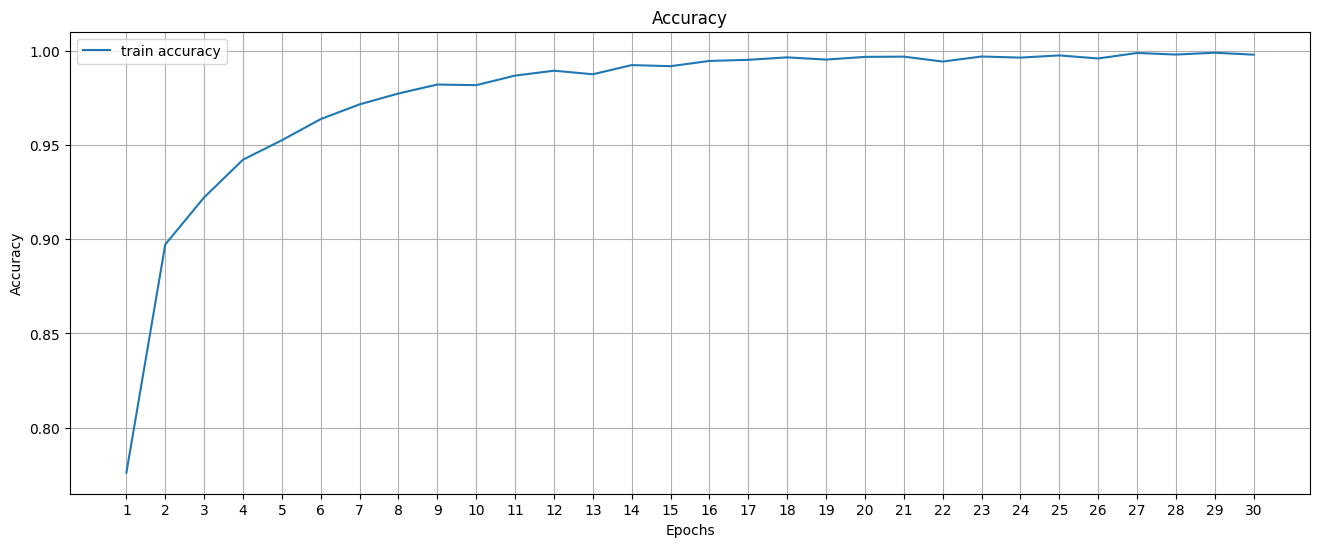

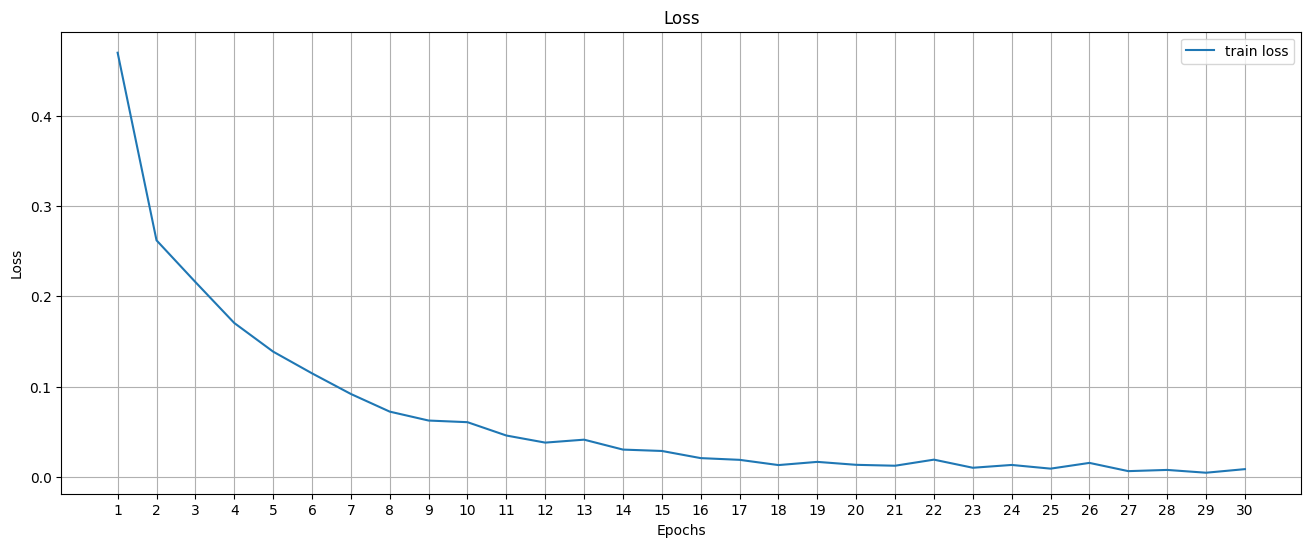

In [9]:
train_acc_cnn_lstm = history_cnn_lstm.history['accuracy']
train_loss_cnn_lstm = history_cnn_lstm.history['loss']

epochs = range(1, len(train_acc_cnn_lstm) + 1)  # buat range dari 1 sampai jumlah epoch

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_acc_cnn_lstm, label="train accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss_cnn_lstm, label="train loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)  # set ticks mulai dari 1
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.models import load_model
model_cnn_lstm.save("../model/model_cnn_lstm_fix.h5") 
model_cnn_lstm = load_model("../model/model_cnn_lstm_fix.h5")  # atau direktori jika pakai SavedModel

481/481 [==============================] - 34s 68ms/step


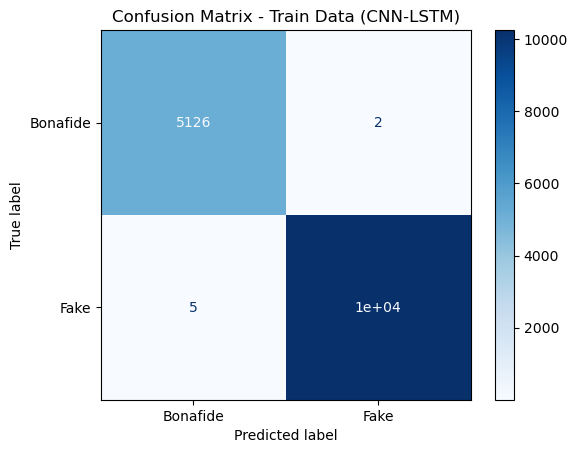

Train Accuracy (CNN-LSTM): 99.95%


In [10]:
# ===== Prediksi pada data latih (CNN-LSTM) =====
y_pred_train_cnn_lstm = model_cnn_lstm.predict(X_train_cnn_lstm)
y_pred_train_classes_cnn_lstm = (y_pred_train_cnn_lstm > 0.5).astype("int32")

# ===== Confusion matrix untuk data latih =====
cm_train_cnn_lstm = confusion_matrix(y_train_cnn_lstm, y_pred_train_classes_cnn_lstm)
disp_train_cnn_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_train_cnn_lstm,
                                             display_labels=["Bonafide", "Fake"])
disp_train_cnn_lstm.plot(cmap="Blues")
plt.title("Confusion Matrix - Train Data (CNN-LSTM)")
plt.show()

# ===== Akurasi data latih =====
acc_train_cnn_lstm = accuracy_score(y_train_cnn_lstm, y_pred_train_classes_cnn_lstm)
print(f"Train Accuracy (CNN-LSTM): {acc_train_cnn_lstm * 100:.2f}%")


690/690 [==============================] - 47s 68ms/step
✅ Test Accuracy (CNN-LSTM): 89.76%


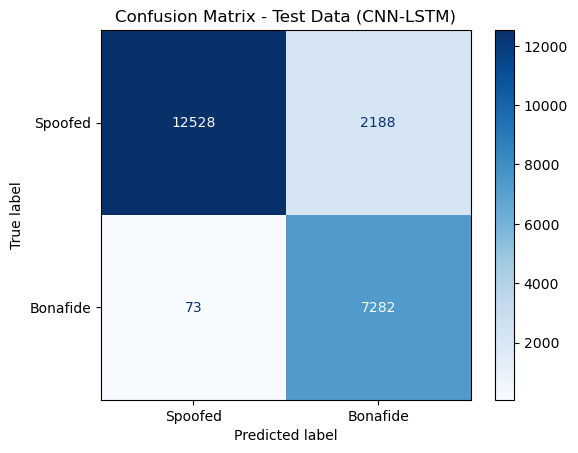

In [11]:
# ===== Evaluasi pada Data Testing (CNN-LSTM) =====
y_pred_test_cnn_lstm = model_cnn_lstm.predict(X_test_cnn_lstm)
y_pred_test_cnn_lstm_labels = (y_pred_test_cnn_lstm > 0.5).astype(int).flatten()
y_test_labels_lstm = y_test_cnn_lstm  # diasumsikan sudah dalam format label biner (0 atau 1)

# Akurasi
test_acc_cnn_lstm = accuracy_score(y_test_labels_lstm, y_pred_test_cnn_lstm_labels)
print(f"✅ Test Accuracy (CNN-LSTM): {test_acc_cnn_lstm * 100:.2f}%")

# Confusion matrix
cf_test_cnn_lstm = confusion_matrix(y_test_labels_lstm, y_pred_test_cnn_lstm_labels, labels=[1, 0])
ConfusionMatrixDisplay(cf_test_cnn_lstm, display_labels=["Spoofed", "Bonafide"]).plot(cmap="Blues")
plt.title("Confusion Matrix - Test Data (CNN-LSTM)")
plt.show()


In [13]:
from sklearn.metrics import classification_report

# ===== METRIK EVALUASI TEST DATA (CNN-LSTM) =====
print("=== Classification Report - Test Data (CNN-LSTM) ===")
print(classification_report(
    y_test_labels_lstm,
    y_pred_test_cnn_lstm_labels,  # Ganti ke hasil prediksi CNN-LSTM
    target_names=["Bonafide", "Spoofed"],
    digits=4
))


=== Classification Report - Test Data (CNN-LSTM) ===
              precision    recall  f1-score   support

    Bonafide     0.7690    0.9901    0.8656      7355
     Spoofed     0.9942    0.8513    0.9172     14716

    accuracy                         0.8976     22071
   macro avg     0.8816    0.9207    0.8914     22071
weighted avg     0.9191    0.8976    0.9000     22071



In [ ]:
data_label = pd.read_csv("../data/processed/test_label.csv")
test_labels = data_label["attack_id"].copy()

In [13]:
test_labels=  pd.DataFrame(test_labels)

In [15]:
test_labels["y_true"]=y_test_cnn_lstm
test_labels["y_pred"] = y_pred_test_cnn_lstm_labels

In [16]:
# Gabungkan hasil prediksi CNN-LSTM ke dalam test_labels
test_labels["y_true"] = y_test_cnn_lstm
test_labels["y_pred"] = y_pred_test_cnn_lstm_labels  # Ganti ke hasil prediksi CNN-LSTM

# Tambahkan kolom 'is_correct' untuk menandai apakah prediksi benar
test_labels["is_correct"] = test_labels["y_true"] == test_labels["y_pred"]

# Hitung jumlah benar dan salah per attack_id
grouped_cnn_lstm = test_labels.groupby(["attack_id", "is_correct"]).size().unstack(fill_value=0)

# Rename kolom agar lebih deskriptif
grouped_cnn_lstm = grouped_cnn_lstm.rename(columns={True: "benar", False: "salah"})

# Tambahkan kolom total
grouped_cnn_lstm["total"] = grouped_cnn_lstm["benar"] + grouped_cnn_lstm["salah"]

# Urutkan berdasarkan jumlah salah (descending)
grouped_cnn_lstm = grouped_cnn_lstm.sort_values(by="salah", ascending=False)

# Tampilkan hasil rekap
print("📊 Rekap klasifikasi per attack_id (CNN-LSTM):")
print(grouped_cnn_lstm)


📊 Rekap klasifikasi per attack_id (CNN-LSTM):
is_correct  salah  benar  total
attack_id                      
A17          1107     25   1132
A18           758    374   1132
A12           106   1026   1132
A13            76   1056   1132
-              73   7282   7355
A15            46   1086   1132
A08            28   1104   1132
A10            27   1105   1132
A19            24   1108   1132
A14             7   1125   1132
A11             5   1127   1132
A16             4   1128   1132
A07             0   1132   1132
A09             0   1132   1132
